<a href="https://colab.research.google.com/github/isadora-llopes/Imersao_Phyton/blob/main/%5BImers%C3%A3o_Python%5D_Aula_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Previsão de Séries Temporais de Ações e Carreiras no Mercado de Dados

In [9]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

In [10]:
dados = yf.download("BTC-USD", start="2020-01-01", end="2024-03-28", progress=False)
dados = dados.reset_index()
dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
3,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
4,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095
...,...,...,...,...,...,...,...
1543,2024-03-23,63802.722656,65976.398438,63038.492188,64062.203125,64062.203125,24738964812
1544,2024-03-24,64070.753906,67622.757812,63825.851562,67234.171875,67234.171875,27206630673
1545,2024-03-25,67234.093750,71162.593750,66414.835938,69958.812500,69958.812500,42700139523
1546,2024-03-26,69931.328125,71535.742188,69335.609375,69987.835938,69987.835938,36010437368


In [11]:
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']

In [12]:
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close':'y'})
dados_prophet_treino

,ds,y
0,2020-01-01,7200.174316
1,2020-01-02,6985.470215
2,2020-01-03,7344.884277
3,2020-01-04,7410.656738
4,2020-01-05,7411.317383
...,...,...
1302,2023-07-26,29354.972656
1303,2023-07-27,29210.689453
1304,2023-07-28,29319.246094
1305,2023-07-29,29356.917969


In [13]:
modelo = Prophet(weekly_seasonality=True,
        yearly_seasonality=True,
        daily_seasonality=False)

modelo.add_country_holidays(country_name='US')

modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3nlk07wl/zpkadiwb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3nlk07wl/7i_65q_y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3274', 'data', 'file=/tmp/tmp3nlk07wl/zpkadiwb.json', 'init=/tmp/tmp3nlk07wl/7i_65q_y.json', 'output', 'file=/tmp/tmp3nlk07wl/prophet_modele9lt_83b/prophet_model-20240329162743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:27:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:27:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [14]:
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

In [15]:
futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)

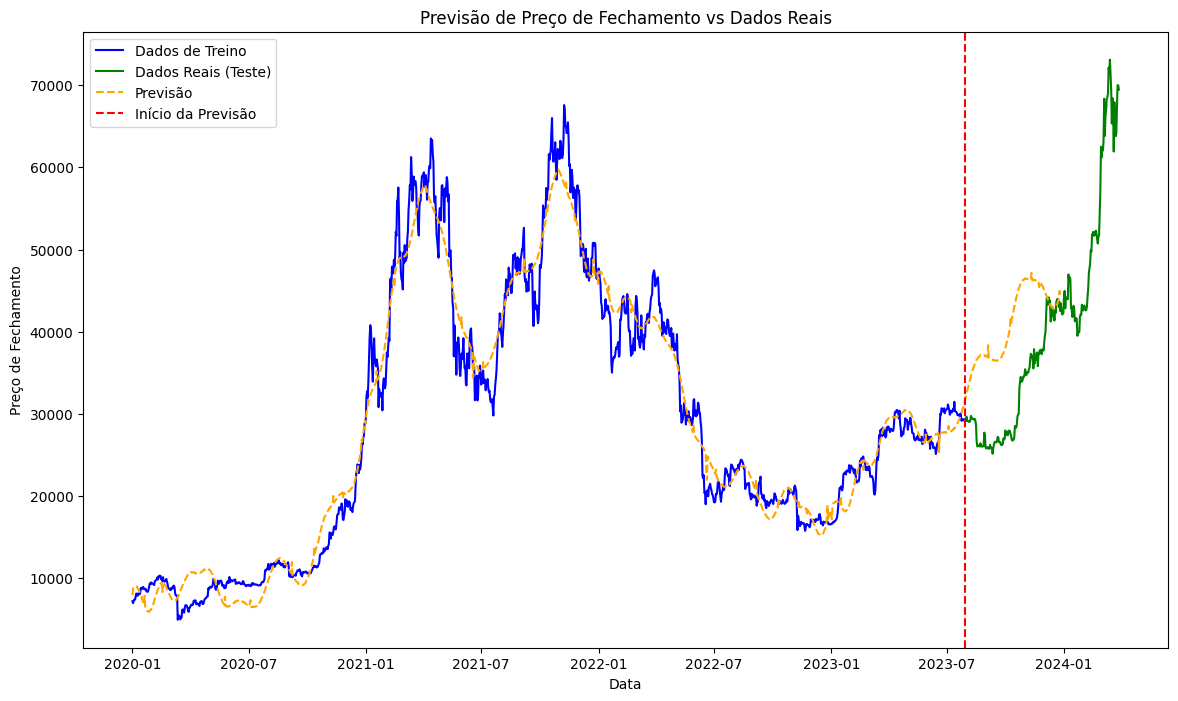

In [16]:
plt.figure(figsize=(14, 8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()